# Visualizing regression models
* http://seaborn.pydata.org/tutorial/regression.html
* https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

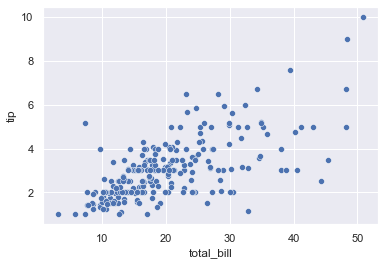

In [4]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

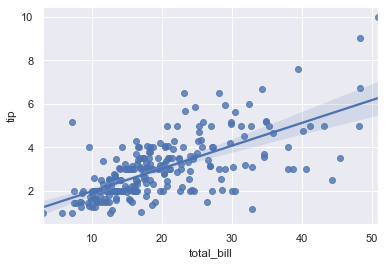

In [5]:
sns.regplot(data=tips, x="total_bill", y="tip")

In [6]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [7]:
tips.groupby(["smoker"]).corr()

total_bill       tip      size
smoker                                           
Yes    total_bill    1.000000  0.488218  0.527890
       tip           0.488218  1.000000  0.332227
       size          0.527890  0.332227  1.000000
No     total_bill    1.000000  0.822183  0.688068
       tip           0.822183  1.000000  0.580107
       size          0.688068  0.580107  1.000000

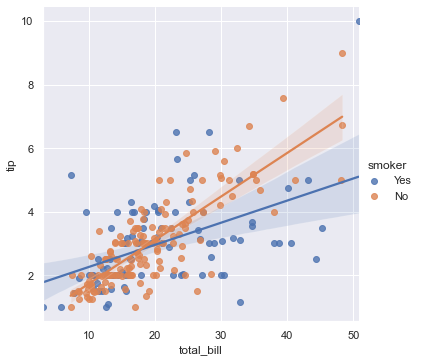

In [8]:
sns.lmplot(x="total_bill", y="tip", data=tips, 
           hue="smoker")

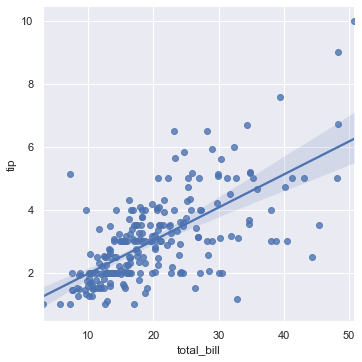

In [9]:
sns.lmplot(x="total_bill", y="tip", data=tips)

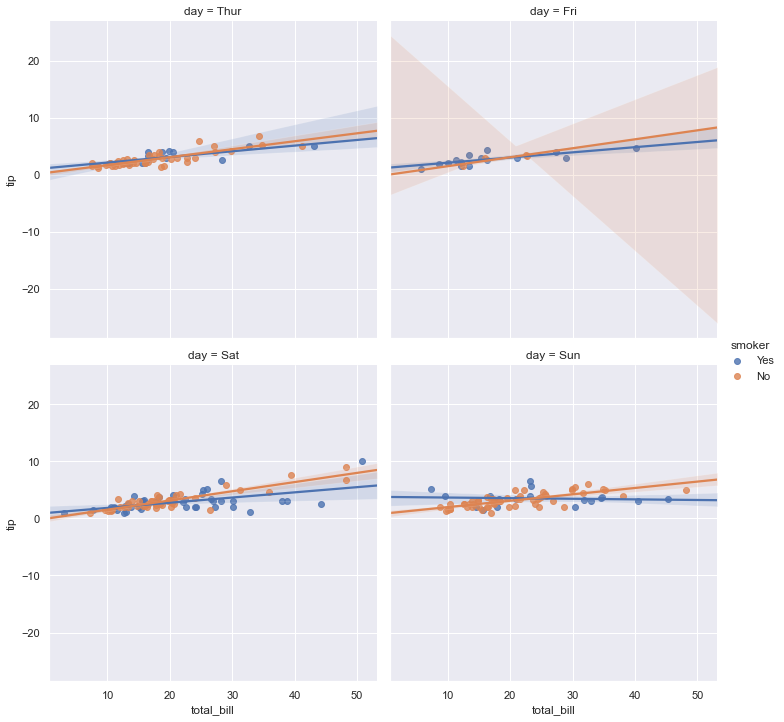

In [10]:
# hue を提供
# subplots(col) を提供
sns.lmplot(x="total_bill", y="tip", data=tips, 
           hue="smoker", truncate=False, col="day", col_wrap=2)

<AxesSubplot:xlabel='size', ylabel='tip'>

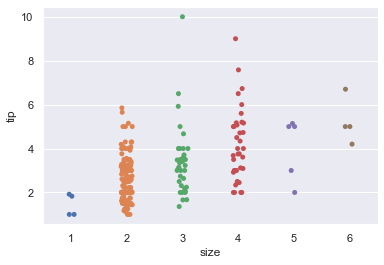

In [11]:
sns.stripplot(x="size", y="tip", data=tips)

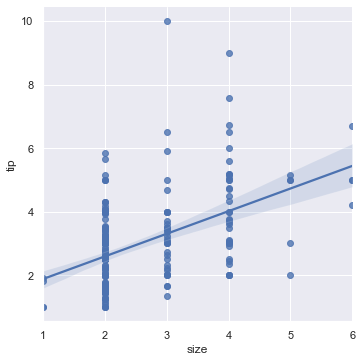

In [12]:
sns.lmplot(x="size", y="tip", data=tips)

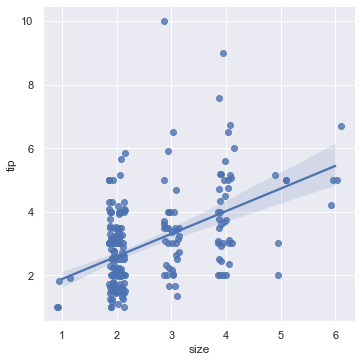

In [13]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.15)

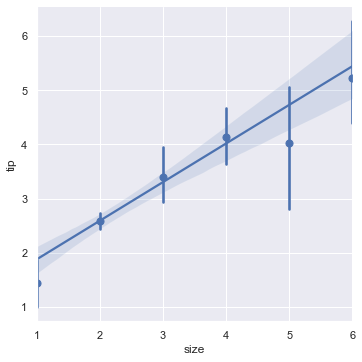

In [14]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

## Fitting different kinds of models

In [15]:
anscombe = sns.load_dataset("anscombe")

In [16]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


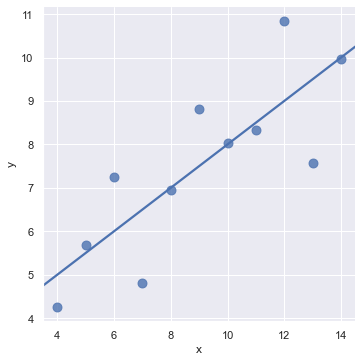

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}, truncate=False)

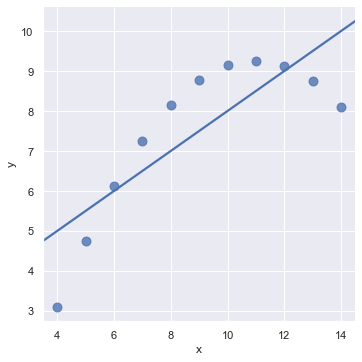

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80}, truncate=False)

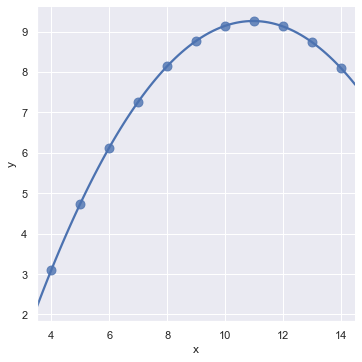

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80}, order=2, truncate=False)

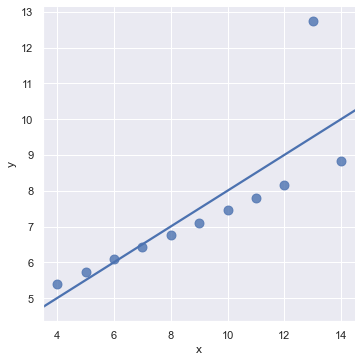

In [20]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}, truncate=False)

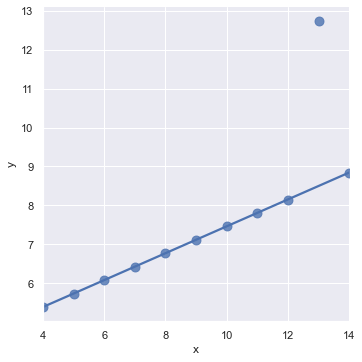

In [21]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

In [22]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
tips

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


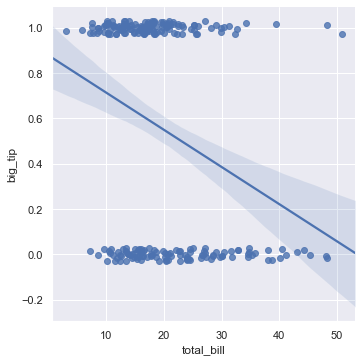

In [23]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03, truncate=False)

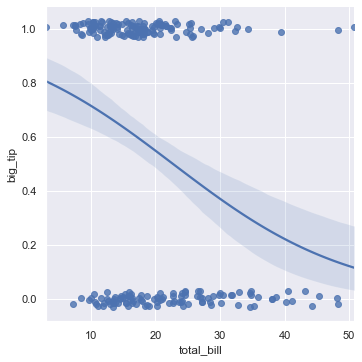

In [24]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

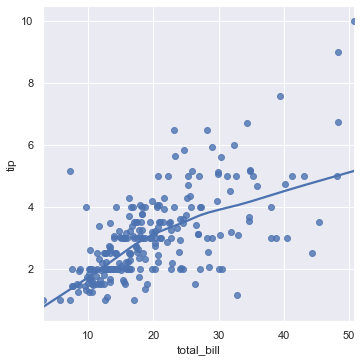

In [25]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

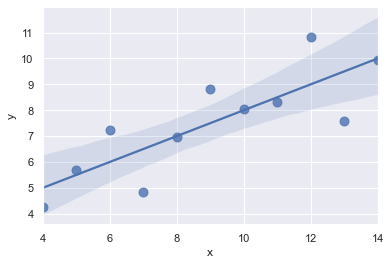

In [26]:
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

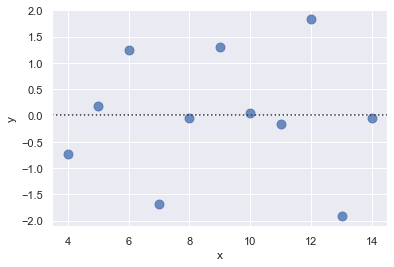

In [27]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

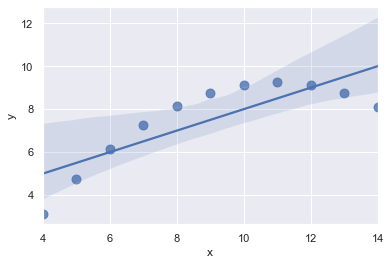

In [28]:
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

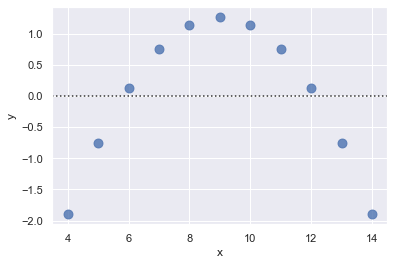

In [29]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables

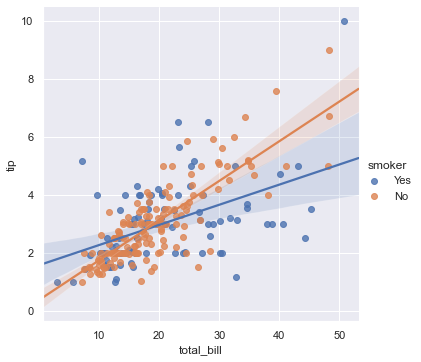

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, truncate=False)

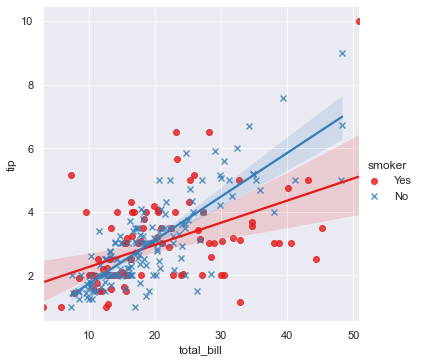

In [31]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

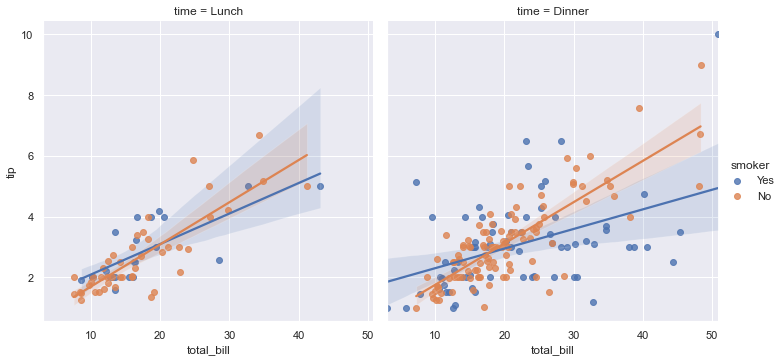

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, col="time")

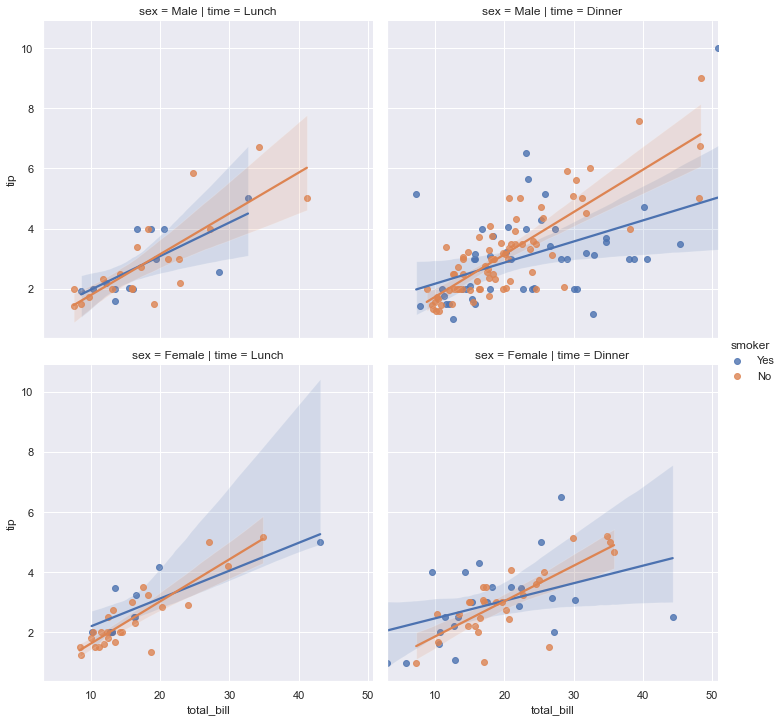

In [33]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

## Controlling the size and shape of the plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

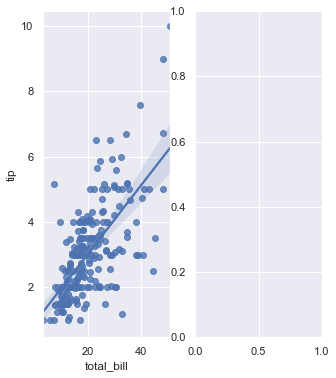

In [76]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax1)

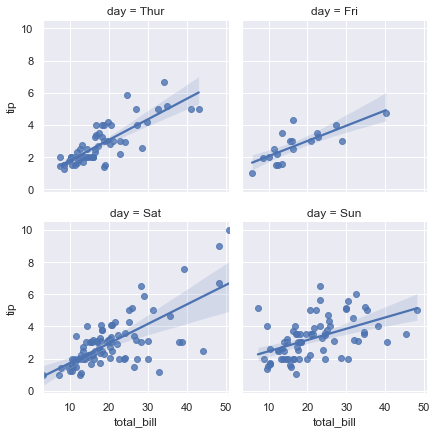

In [35]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3)

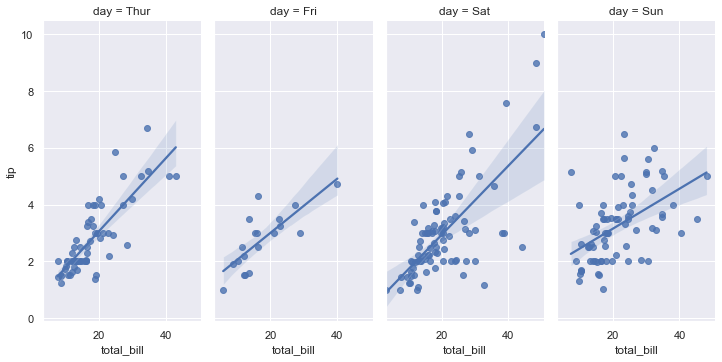

In [36]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5)

## Plotting a regression in other contexts

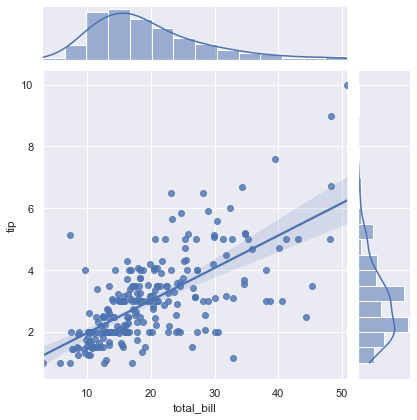

In [37]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

In [38]:
tips

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


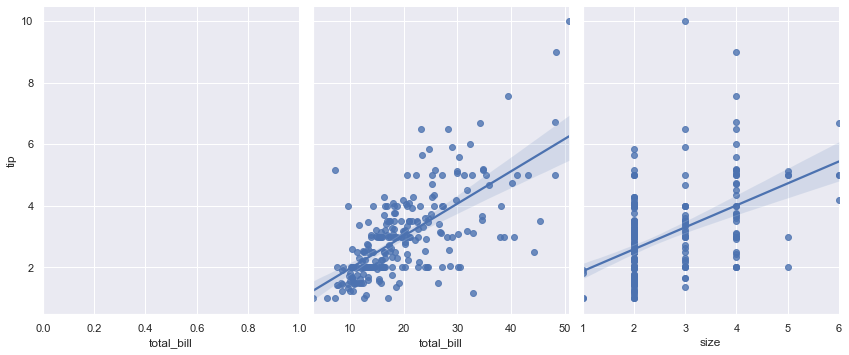

In [64]:
sns.pairplot(tips, x_vars=["total_bill","total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg")

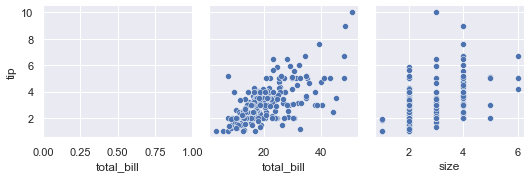

In [62]:
sns.pairplot(tips, x_vars=["total_bill","total_bill","size"], y_vars=["tip"])

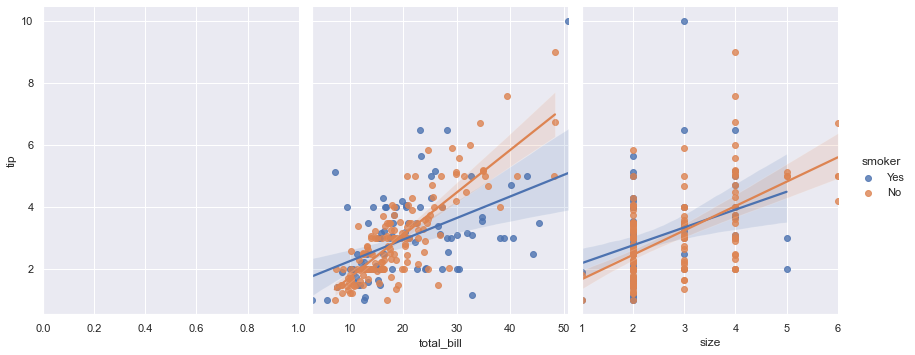

In [63]:
sns.pairplot(tips, x_vars=["","total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

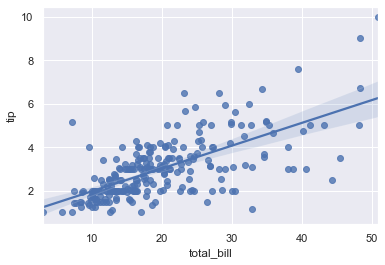

In [41]:
sns.regplot(data=tips, x="total_bill", y="tip")